# Sesión 10
## Estadistica Aplicada 
**Jose Alfonso Gonzalez Acosta**
- 8 de marzo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

In [3]:
rossi = load_rossi()

In [4]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


**week**: tiempo de supervivencia en semana

**evento**: es liberado hasta que vuelve a ser arrestado

**arrest**: 1 arrestado, 0 si no

**fin**: 1 recibe dinero al salir de la cárcel, 0 si no

**age**: edad en el momento de la liberación

**race**: 1 negro, 0 otro caso

**wexp**: 1 tenía trabajo de tiempo completo en el momento del arresto, 0 si no

**mar**: 1 si está casado al momento de la liberación, 0 si no

**paro**: 1 si esta en libertad condicional, 0 otro caso

**prio**: número de encarcelamientos anteriores

**Objetivo**: es medir el riesgo de volver a ser arrestado en función de las variables que tenemos.

**Hipótesis**

1. Si reciben dinero (fin) al salir de la cárcel disminuye el riesgo de voler a ser arrestado, porque no se tiene la necesidad de robar.

2. Los jóvenes son mas inexpertos ("tontos") y los atrapan más fácil, por tanto tienen mas riesgo de volver a ser arrestados.

3. Los negros (1970) tienen más riesgo de volver a ser arrestados.

4. No influye si tenías trabajo en el riesgo de volver a ser arrestado.

5. a) Tienes familia, robas más para mantenerla. b) No robas porque si te arrestan se quedan sin el sustento del hogar.

6. Si tienes libertad condicional el riesgo de volver a ser arrestado disminuye.

7. Entre más veces hayas sido arrestado, aumenta el riesgo de volver a ser arrestado.


In [6]:
rossi.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,45.854167,0.263889,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796
std,12.662293,0.441251,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068
min,1.000000,0.000000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.000000,0.000000,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.000000,1.000000,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,52.000000,1.000000,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


In [7]:
arrestados = rossi.query('arrest==1')
no_arrestados = rossi.query('arrest==0')

In [9]:
arrestados.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,114.000000,114.0,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,28.710526,1.0,0.421053,22.763158,0.894737,0.456140,0.070175,0.596491,3.771930
std,14.447784,0.0,0.495908,5.123782,0.308247,0.500272,0.256570,0.492767,3.587182
min,1.000000,1.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.0,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,28.000000,1.0,0.000000,21.000000,1.000000,0.000000,0.000000,1.000000,3.000000
75%,41.500000,1.0,1.000000,24.750000,1.000000,1.000000,0.000000,1.000000,5.000000
max,52.000000,1.0,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


In [10]:
no_arrestados.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,318.0,318.0,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,52.0,0.0,0.528302,25.254717,0.871069,0.613208,0.141509,0.625786,2.701258
std,0.0,0.0,0.499985,6.309666,0.335652,0.487783,0.349096,0.484682,2.552057
min,52.0,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.0,0.0,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.0,0.0,1.000000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.0,0.0,1.000000,28.000000,1.000000,1.000000,0.000000,1.000000,3.000000
max,52.0,0.0,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,15.000000


In [11]:
rossi.groupby('arrest')['fin'].describe()

,count,mean,std,min,25%,50%,75%,max
arrest,,,,,,,,
0,318.0,0.528302,0.499985,0.0,0.0,1.0,1.0,1.0
1,114.0,0.421053,0.495908,0.0,0.0,0.0,1.0,1.0


In [12]:
cph = CoxPHFitter().fit(rossi,'week','arrest')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-03-08 21:47:38 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

**Evento**: volver a ser arrestado.
El signo de "coef" nos dice si la variable aumenta/disminuye el riesgo.
El exp(coef) te dice el efecto.

Si coef < 0 --> 1-exp(coef)

Si coef < 0 --> exp(coef)-1

Suponer "fin" tiene efecto.
Recibir dinero disminuye el riesgo de volver a ser arrestado, los que reciben dinero tienen 32% menos riesgo de ser arrestados que alguien que no recibe ayuda.

La edad disminuye el riesgo de volver a ser arrestado, en promedio por cada año cumplido el riesgo de ser arrestado disminuye en 6%.
Tener arrestos anteriores aumenta el riesgo de volver a ser arrestado, en promedio por cada arresto anterior el riesgo de ser arrestado aumenta 10%.

<AxesSubplot:>

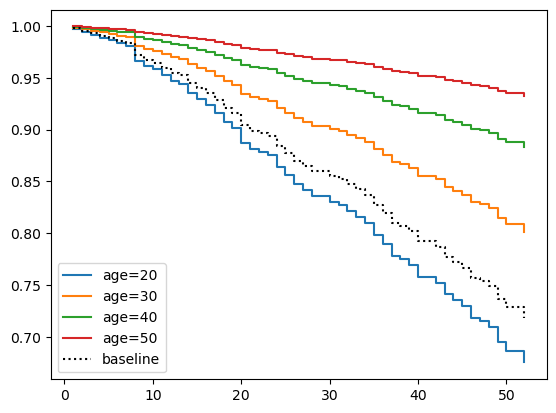

In [13]:
cph.plot_partial_effects_on_outcome(covariates='age',values=[20,30,40,50])